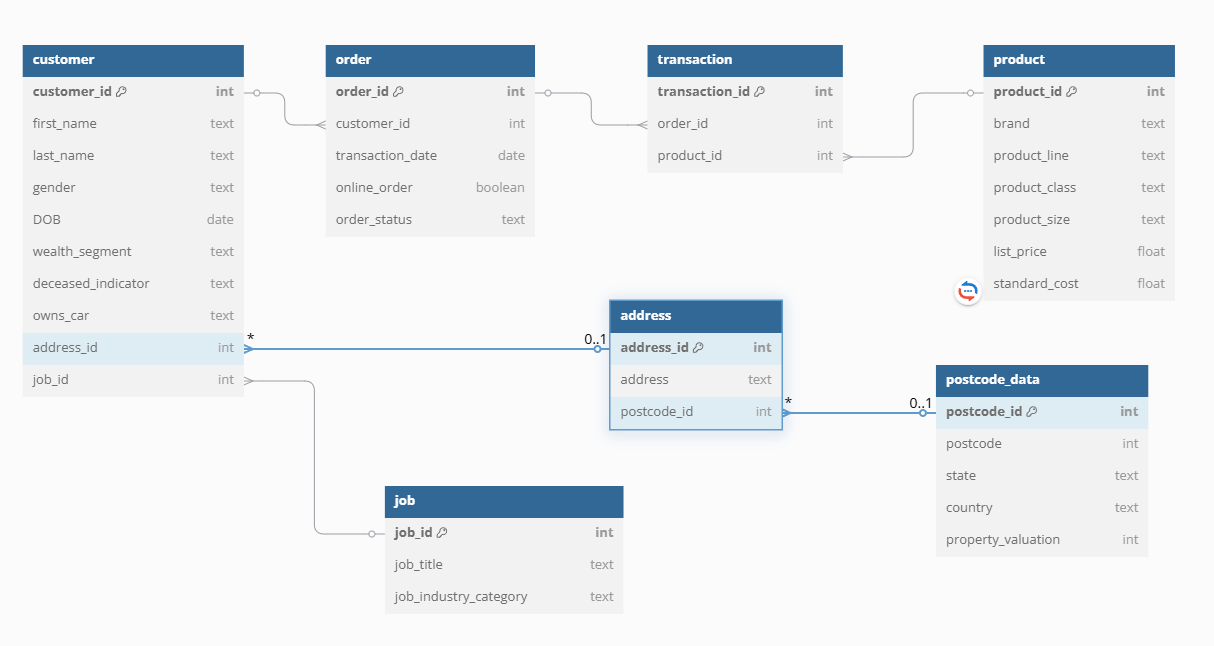

**Первая нормальная форма (1НФ)**

1НФ требует, чтобы:
Все столбцы содержали атомарные (неделимые) значения.
Каждая строка была уникальна.
В таблице не было повторяющихся групп данных.

*Проблемы в transaction*
online_order и order_status могут быть вынесены в отдельную таблицу "order" (так как статус заказа может меняться).
Поля brand, product_line, product_class, product_size связаны с товарами, но идут в transaction, хотя их место в таблице "product".

*Проблемы в customer*
address, postcode, state, country относятся к адресам, их можно выделить в отдельную таблицу "address".
job_title, job_industry_category могут быть вынесены в "job".

*Решение:*

Вынести товары в product.
Вынести заказы в order.
Вынести адреса в address.
Вынести работу в job.
Вторая нормальная форма (2НФ)
**2НФ требует, чтобы:**

Таблица была в 1НФ.
Все неключевые атрибуты зависели только от первичного ключа.

*Проблемы:*
В transaction атрибуты brand, product_line, product_class, product_size зависят от product_id, но product_id не является ключом таблицы → значит, эти данные нужно вынести в product.
В customer атрибут state, country зависят от postcode → значит, их лучше вынести в address.

*Решение:*

Вынести информацию о товарах в product.
Вынести информацию о заказах в order.
Вынести почтовые данные в postcode_data.
**Третья нормальная форма (3НФ)**
3НФ требует, чтобы:

Таблица была в 2НФ.
В ней не было транзитивных зависимостей (атрибуты зависели не от первичного ключа, а от других неключевых атрибутов).

*Проблемы:*
В customer поля state и country зависят от postcode, а не от customer_id.
В transaction цена и себестоимость относятся к product, но они здесь.

*Решение:*

Вынести state, country в postcode_data.
Вынести list_price, standard_cost в product.

**Итоговая структура базы данных**

*customer*

customer_id (PK)

first_name

last_name

gender

DOB

wealth_segment

deceased_indicator

owns_car

address_id (FK → address)

job_id (FK → job)

*job*

job_id (PK)

job_title

job_industry_category

*address*

address_id (PK)

address

postcode_id (FK → postcode_data)


*postcode_data*

postcode_id (PK)

postcode

state

country

property_valuation

*order*

order_id (PK)

customer_id (FK → customer)

transaction_date

online_order

order_status

*transaction*

transaction_id (PK)

order_id (FK → order)

product_id (FK → product)

*product*

product_id (PK)

brand

product_line

product_class

product_size

list_price

standard_cost

In [ ]:
-- Таблица клиентов
CREATE TABLE customer (
    customer_id int PRIMARY KEY,
    first_name TEXT,
    last_name TEXT,
    gender TEXT,
    DOB DATE,
    wealth_segment TEXT,
    deceased_indicator TEXT,
    owns_car TEXT,
    address_id INT,
    job_id INT,
    FOREIGN KEY (address_id) REFERENCES address(address_id),
    FOREIGN KEY (job_id) REFERENCES job(job_id)
);

-- Таблица профессий
CREATE TABLE job (
    job_id SERIAL PRIMARY KEY,
    job_title TEXT,
    job_industry_category TEXT
);

-- Таблица адресов
CREATE TABLE address (
    address_id SERIAL PRIMARY KEY,
    address TEXT,
    postcode_id INT,
    FOREIGN KEY (postcode_id) REFERENCES postcode_data(postcode_id)
);

-- Таблица данных о почтовых индексах
CREATE TABLE postcode_data (
    postcode_id SERIAL PRIMARY KEY,
    postcode INT,
    state TEXT,
    country TEXT,
    property_valuation INT
);

-- Таблица заказов
CREATE TABLE "order" (
    order_id SERIAL PRIMARY KEY,
    customer_id INT,
    transaction_date DATE,
    online_order BOOLEAN,
    order_status TEXT,
    FOREIGN KEY (customer_id) REFERENCES customer(customer_id)
);

-- Таблица транзакций
CREATE TABLE transaction (
    transaction_id SERIAL PRIMARY KEY,
    order_id INT,
    product_id INT,
    FOREIGN KEY (order_id) REFERENCES "order"(order_id),
    FOREIGN KEY (product_id) REFERENCES product(product_id)
);

-- Таблица продуктов
CREATE TABLE product (
    product_id int PRIMARY KEY,
    brand TEXT,
    product_line TEXT,
    product_class TEXT,
    product_size TEXT,
    list_price FLOAT,
    standard_cost FLOAT
);


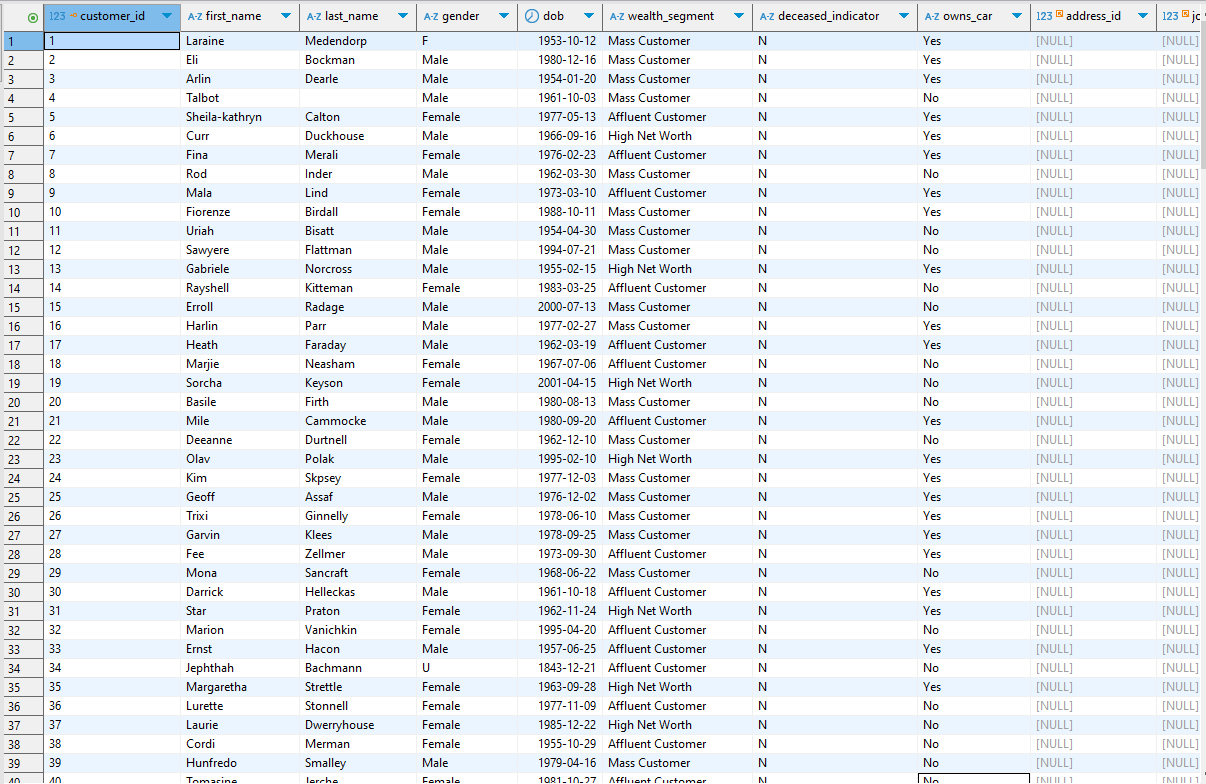

Делал загрузку данных файлами. У меня появился вопрос: как при создании таблиц с вторичными ключами сделать так, чтобы эти ключи переносились в другие таблицы?